In [109]:
import pandas as pd
from pyexcel_ods import get_data
import numpy as np
import matplotlib.pyplot as plt

In [119]:
path = r"C:\Users\demo\Documents\Programmierung\Lebkuchen_Auswertung\23-03_Lebkuchen_Auswertung.ods"
ods_data = get_data(path)

# Extract the first sheet (if there are multiple sheets)
# You can access other sheets by changing the index.
df = pd.DataFrame(ods_data[list(ods_data.keys())[0]])
#print(df)
df.columns = df.iloc[0]

df = df.iloc[1:].reset_index(drop=True)
row_as_csv = df.loc[0].apply(lambda x: str(int(x))+","+str(int((x*10)%10)))
df.loc[0] = row_as_csv
names = ["DOUCEUR NUERNBERGER", "FAVORINA NUERNBERGER", "WEISS NUERNBERGER", "WINTERTRAUM NUERNBERGER", "DOUCEUR LEBKUCHEN", "WEISS CONTRELLA", "BAHLSEN CONTESSA", "FAVORINA LEBKUCHEN", "BAHLEN CONTESSA SCHOKO", "WEISS COCOSELLA", "REWE SCHOKO"]

weights_dict = {"Geschmack": .25,
                "Konsistenz": .15,
                "Guss": .15,
                "Geruch": .15,
                "Verpackung": .1,
                "Optik": .1,
                "Groesse": .2
               }

In [120]:
f_median = lambda x: np.round(np.median([int(val) for val in x.split(sep=",")]), decimals=2)
f_average = lambda x: np.round(np.average([int(val) for val in x.split(sep=",")]), decimals=2)

In [121]:
df_average = df.applymap(f_average)
df_average.columns = df.columns
df_median = df.applymap(f_median)
df_median.columns = df.columns

C:\Users\demo\AppData\Local\Temp\ipykernel_2640\3358526922.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_average = df.applymap(f_average)
C:\Users\demo\AppData\Local\Temp\ipykernel_2640\3358526922.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_median = df.applymap(f_median)


In [122]:
results_average = df_average.mul(pd.Series(weights_dict), axis=1).sum(axis=1).tolist()
results_median =  df_median.mul(pd.Series(weights_dict), axis=1).sum(axis=1).tolist()

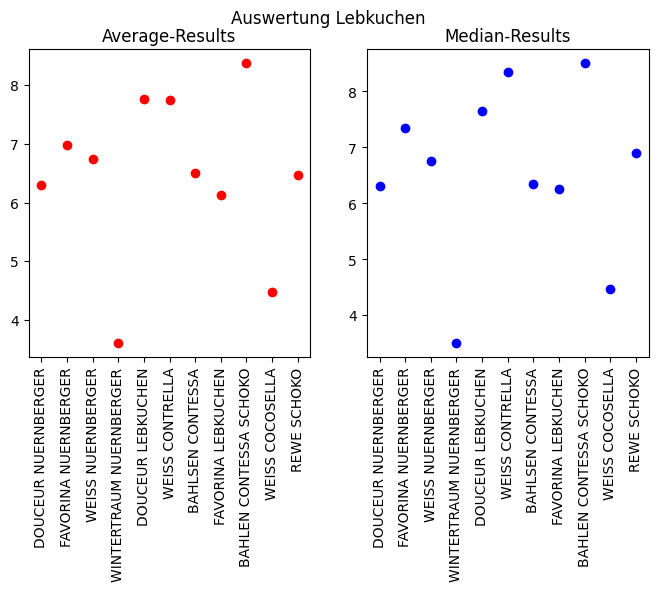

In [124]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(8, 4))
axes[0].plot(np.arange(len(results_average)), results_average, 'or')
axes[0].set_title("Average-Results")
axes[0].set_xticks(np.arange(len(results_average)))
axes[0].set_xticklabels(names, rotation=90)
axes[1].plot(np.arange(len(results_median)), results_median, 'ob')
axes[1].set_title("Median-Results")
axes[1].set_xticks(np.arange(len(results_average)))
axes[1].set_xticklabels(names, rotation=90)
fig.suptitle(f"Auswertung Lebkuchen")
plt.savefig(".\Auswertung.png")
plt.show()